In [4]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0.2 is required
import sklearn
assert sklearn.__version__ >= "1.0.2"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)


# Load and process data

In [6]:
# read data from csv file
trainset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/trainset.csv')
testset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/testset.csv')
print(trainset.shape)
print(testset.shape)

(80000, 15)
(20000, 15)


In [7]:
trainset

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.341575,1.159034,0.012636,0.451710,0.794808,0.347226,0.116634,0.755911,0.674340,1.359338,0.3233,1.1590,0.02901,0.4719,0.79480
1,0.638607,0.558054,1.231009,0.243433,1.132821,0.038278,0.185744,0.734268,1.464984,1.489907,0.4584,0.5581,1.24700,0.5882,1.13300
2,0.787981,0.763241,0.349968,0.738449,1.452716,1.117356,0.110285,0.393380,0.282715,1.466671,0.8053,0.7632,0.34980,0.7038,1.45300
3,0.466115,0.948450,0.942671,1.051085,1.358636,0.470234,0.252135,0.914662,1.318543,1.076570,0.4558,0.9484,0.94180,1.0730,1.35900
4,0.452663,0.644895,1.360873,0.991130,0.162887,1.361588,1.475943,0.637112,0.397679,1.414160,0.4939,0.6449,1.34300,0.9266,0.16290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.796601,0.398041,1.132371,0.996845,0.094560,1.074895,1.055513,0.777877,0.870241,0.361988,0.8083,0.3980,1.12600,0.9802,0.09456
79996,0.942419,1.456538,1.164360,0.775981,0.069458,1.024540,1.025283,0.144121,1.438743,0.241862,0.9305,1.4570,1.15000,0.8141,0.06946
79997,1.095302,0.438446,1.335379,0.365207,0.273701,0.765942,0.880543,1.152310,1.119219,1.104459,1.0670,0.4384,1.33500,0.4223,0.27370
79998,0.310626,0.661302,0.192742,1.280823,0.931653,0.199012,0.072267,0.870017,0.563615,0.006399,0.3275,0.6613,0.21380,1.2260,0.93170


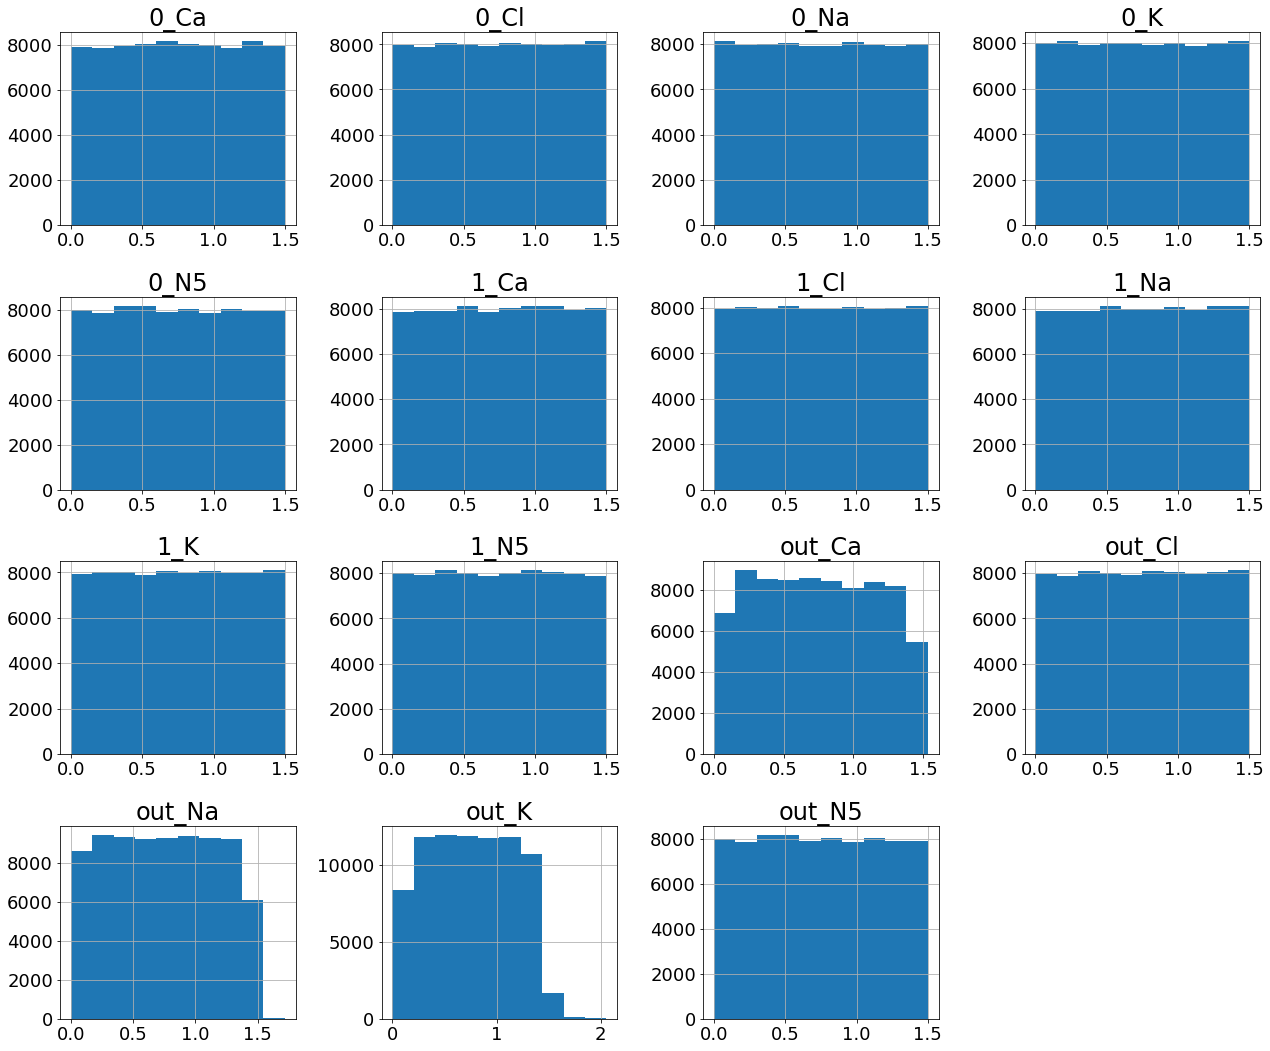

In [8]:
trainset.hist(figsize=(18, 15));
plt.tight_layout()

In [9]:
# split x and y
X_train = trainset.iloc[:, [0,2,3,5,7,8]].values 
y_train = trainset.iloc[:, [10, 12, 13]].values
X_test = testset.iloc[:, [0,2,3,5,7,8]].values 
y_test = testset.iloc[:, [10, 12, 13]].values

# Name variables
inputs = [list(trainset)[i] for i in [0,2,3,5,7,8]] 
outputs = [list(trainset)[i] for i in [10, 12, 13]] # do not work for list -> list(trainset)[10, 12, 13]

In [10]:
print('Inputs: ', inputs)
print('Outputs: ', outputs)
print('X_train instances: ', X_train.shape)
print('X_test instances: ', X_test.shape)
print('y_train instances: ', y_train.shape)
print('y_test instances: ', y_test.shape)

Inputs:  ['0_Ca', '0_Na', '0_K', '1_Ca', '1_Na', '1_K']
Outputs:  ['out_Ca', 'out_Na', 'out_K']
X_train instances:  (80000, 6)
X_test instances:  (20000, 6)
y_train instances:  (80000, 3)
y_test instances:  (20000, 3)


In [11]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
print('X', X.shape)
print('y', y.shape)

X (100000, 6)
y (100000, 3)


## Normalize data

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

norm_pipeline = Pipeline([
        ('minmax_scaler', MinMaxScaler((-1,1))),
    ])

X_train_norm = norm_pipeline.fit_transform(X_train)
X_test_norm = norm_pipeline.transform(X_test)
X_norm = norm_pipeline.fit_transform(X)

# Learning curve

In [13]:
import joblib
model = joblib.load("XGBmodel.pkl") 

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


start = time.time()
train_sizes, train_scores, valid_scores, fit_times, _  = learning_curve(
                                                        model, 
                                                        X_norm, 
                                                        y, 
                                                        train_sizes=[0.1  , 0.325, 0.55 , 0.775, 1.], 
                                                        cv=5,
                                                        scoring = 'neg_mean_squared_error',
                                                        return_times = True,
                                                        verbose = 10,
                                                        n_jobs= 40)
end = time.time()
print("time = ", start - end)

[learning_curve] Training set sizes: [ 8000 26000 44000 62000 80000]


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done   2 out of  25 | elapsed:   13.3s remaining:  2.6min
[Parallel(n_jobs=40)]: Done   5 out of  25 | elapsed:   18.0s remaining:  1.2min
[Parallel(n_jobs=40)]: Done   8 out of  25 | elapsed:   34.9s remaining:  1.2min
[Parallel(n_jobs=40)]: Done  11 out of  25 | elapsed:   51.3s remaining:  1.1min
[Parallel(n_jobs=40)]: Done  14 out of  25 | elapsed:   58.9s remaining:   46.2s
[Parallel(n_jobs=40)]: Done  17 out of  25 | elapsed:  1.1min remaining:   31.9s
[Parallel(n_jobs=40)]: Done  20 out of  25 | elapsed:  1.3min remaining:   19.0s
[Parallel(n_jobs=40)]: Done  23 out of  25 | elapsed:  1.5min remaining:    7.9s


time =  -93.65483617782593


[Parallel(n_jobs=40)]: Done  25 out of  25 | elapsed:  1.6min finished


In [15]:
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
test_scores_mean = -np.mean(valid_scores, axis=1)
test_scores_std = -np.std(valid_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

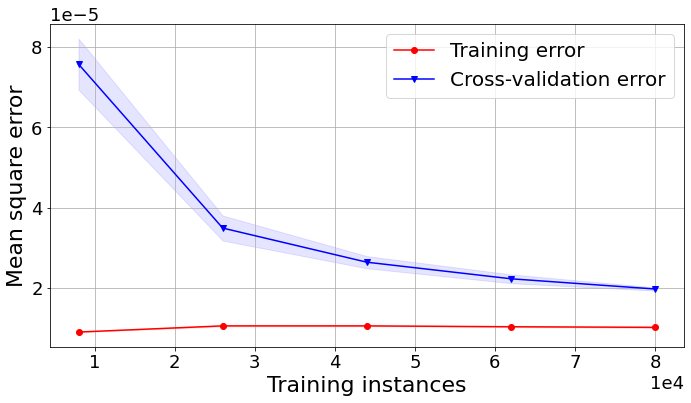

In [16]:
# Plot forward and backward march   
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)

plt.figure(figsize=(10,6))
#plt.title(title)
plt.xlabel("Training instances")
plt.ylabel("Mean square error")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="b")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training error")
plt.plot(train_sizes, test_scores_mean, 'v-', color="b",label="Cross-validation error")
plt.legend(loc="best")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig('learning_curve.png')

Text(0.5, 1.0, 'Scalability of the model')

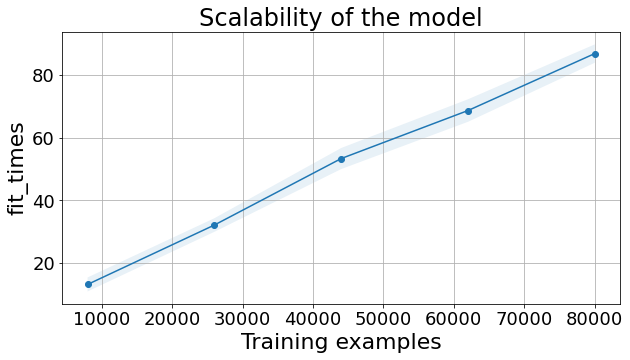

In [17]:
# Plot n_samples vs fit_times
plt.figure(figsize=(10,5))

plt.grid()
plt.plot(train_sizes, fit_times_mean, "o-")
plt.fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.1,
)
plt.xlabel("Training examples")
plt.ylabel("fit_times")
plt.title("Scalability of the model")



Text(0.5, 1.0, 'Performance of the model')

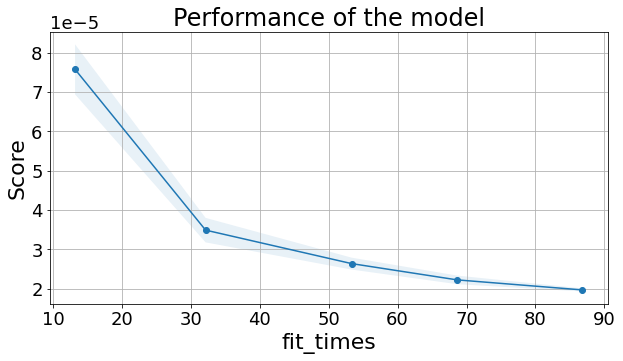

[CV] START .....................................................................
[CV] END ................., score=(train=-0.000, test=-0.000) total time=  11.4s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.000, test=-0.000) total time=  11.6s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.000, test=-0.000) total time=  12.5s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.000, test=-0.000) total time=  16.2s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.000, test=-0.000) total time=  16.5s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.000, test=-0.000) total time=  29.3s
[CV] START .................

In [18]:
# Plot fit_time vs score
plt.figure(figsize=(10,5))

fit_time_argsort = fit_times_mean.argsort()
fit_time_sorted = fit_times_mean[fit_time_argsort]
test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
test_scores_std_sorted = test_scores_std[fit_time_argsort]
plt.grid()
plt.plot(fit_time_sorted, test_scores_mean_sorted, "o-")
plt.fill_between(
    fit_time_sorted,
    test_scores_mean_sorted - test_scores_std_sorted,
    test_scores_mean_sorted + test_scores_std_sorted,
    alpha=0.1,
)
plt.xlabel("fit_times")
plt.ylabel("Score")
plt.title("Performance of the model")